# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Step 2. Import the dataset from this [Online_Retail.csv](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv) from the folder.

In [2]:
online_rt = pd.read_csv('F:/analytix_labs/2. Pandas Basic Exercises/Exercise Data Files/Pandas Exercise Online Retail files/Online_Retail.csv',encoding='latin')

### Step 3. Assign it to a variable called online_rt

In [3]:
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

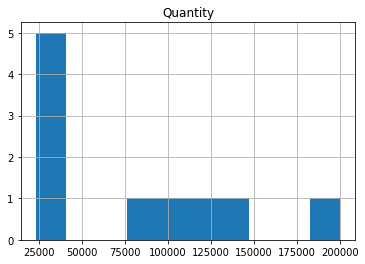

,Country,Quantity
0,Australia,83653
1,Austria,4827
2,Bahrain,260
3,Belgium,23152
4,Brazil,356
5,Canada,2763
6,Channel Islands,9479
7,Cyprus,6317
8,Czech Republic,592
9,Denmark,8188


In [4]:
quant=online_rt.groupby('Country').Quantity.sum().reset_index()
quant.loc[(quant.Country != 'United Kingdom')].sort_values('Quantity',ascending=False).reset_index(drop =True).head(10).hist()
#quant.iloc[0:10].hist()
plt.show()
quant

### Step 5.  Exclude negative Quatity entries

In [5]:
quant_non_neg=online_rt.loc[(online_rt.Quantity > 0)]
quant_non_neg

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

In [81]:
quan_unit=online_rt.loc[((online_rt.Country == 'United Kingdom') |(online_rt.Country == 'Netherlands') | (online_rt.Country == 'EIRE')) & (online_rt.Quantity > 0) & (online_rt.UnitPrice>0)]
quan_unit.loc[:,'Quant_UnitPrice']=quan_unit.Quantity / quan_unit.UnitPrice
quan_unit1=quan_unit.groupby(['Country','CustomerID']).Quant_UnitPrice.sum().reset_index()
#g = sns.FacetGrid(quan_unit, col="Quant_UnitPrice", row="CustomerID")
#g = g.map(plt.scatter, "Country", color="r")
#g

,Country,CustomerID,Quant_UnitPrice
0,EIRE,14016.0,2873.935672
1,EIRE,14156.0,69967.839337
2,EIRE,14911.0,126447.181665
3,Netherlands,12759.0,914.505296
4,Netherlands,12775.0,858.358816
...,...,...,...
3927,United Kingdom,18280.0,12.956950
3928,United Kingdom,18281.0,94.245827
3929,United Kingdom,18282.0,214.129079
3930,United Kingdom,18283.0,1340.306391


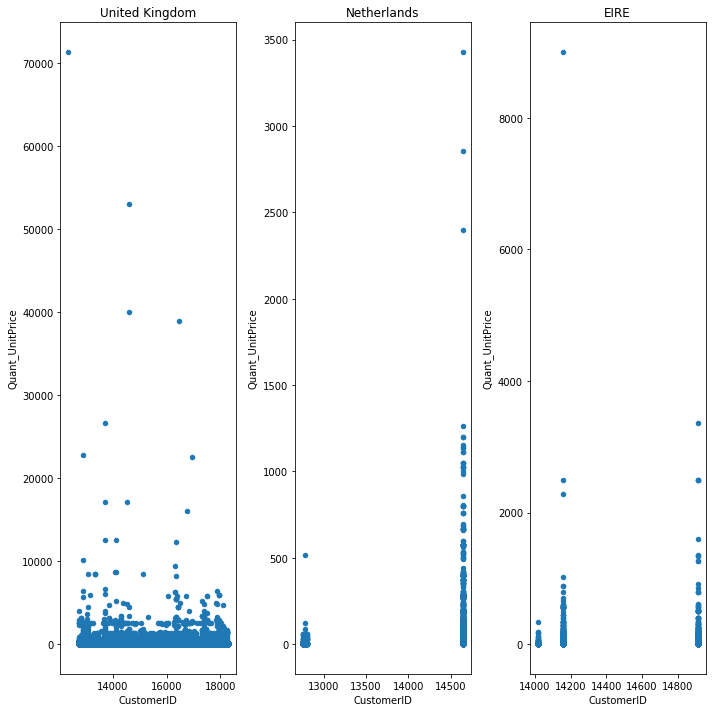

In [82]:
u = quan_unit.Country.unique()
fig, axes = plt.subplots(ncols=len(u), figsize=(10,10))

for Country, ax in zip(u, axes):
    quan_unit[quan_unit.Country==Country].plot.scatter(x='CustomerID',y='Quant_UnitPrice',title=Country, ax =ax )

plt.tight_layout() 
#plt.ylim(0,500)
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000026126788>,
      dtype=object)

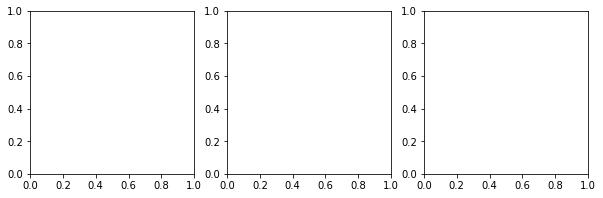

In [45]:
fig, axes = plt.subplots(ncols=len(u), figsize=(10,3))
axes

In [23]:
online_rt.groupby('Country').Quantity.sum().reset_index().sort_values('Quantity',ascending = False).head(3)

,Country,Quantity
36,United Kingdom,4263829
24,Netherlands,200128
10,EIRE,142637


In [24]:
quan_unit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506045 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      506045 non-null object
StockCode      506045 non-null object
Description    504591 non-null object
Quantity       506045 non-null int64
InvoiceDate    506045 non-null object
UnitPrice      506045 non-null float64
CustomerID     371734 non-null float64
Country        506045 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 34.7+ MB


In [14]:
quantonline_rt.loc[(online_rt.Country == 'United Kingdom') |(online_rt.Country == 'Netherlands') | (online_rt.Country == 'EIRE')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/11 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/11 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/11 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/11 12:49,8.95,13113.0,United Kingdom


In [124]:
quan_unit=quan_unit.reset_index()
quan_unit.applymap()

In [125]:
quan_unit.loc[(quan_unit.Country == 'EIRE') & (quan_unit.CustomerID== 14016.0)]

,Country,CustomerID,UnitPrice,Quantity
0,EIRE,14016.0,0.19,96
1,EIRE,14016.0,0.21,72
2,EIRE,14016.0,0.29,48
3,EIRE,14016.0,0.39,72
4,EIRE,14016.0,0.42,146
5,EIRE,14016.0,0.62,24
6,EIRE,14016.0,0.65,204
7,EIRE,14016.0,0.72,48
8,EIRE,14016.0,0.85,348
9,EIRE,14016.0,1.25,216
